# **The Sparks Foundation** : Graduate Rotational Internship Program




# *Data Science & Business Analytics Tasks*

 ***Name: Shweta Sharad Katkar***

## Task 1 - Prediction using Supervised ML

Predict the percentage of an student based on the no. of study hours.

### Simple Linear Regression with Python Scikit Learn
In this regression task we will predict the percentage of marks that a student is expected to score based upon the number of hours they studied. This is a simple linear regression task as it involves just two variables.

### Importing libraries 

In [1]:
import pandas as pd
import numpy as np  
import matplotlib.pyplot as plt  
import seaborn as sns
%matplotlib inline

In [2]:
import warnings
warnings.filterwarnings('ignore')

### Reading data from remote link

In [3]:
url = "http://bit.ly/w-data"
s_data = pd.read_csv(url)
print("Data imported successfully")

s_data.head(10)

Data imported successfully


,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30
5,1.5,20
6,9.2,88
7,5.5,60
8,8.3,81
9,2.7,25


In [4]:
s_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25 entries, 0 to 24
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Hours   25 non-null     float64
 1   Scores  25 non-null     int64  
dtypes: float64(1), int64(1)
memory usage: 528.0 bytes


In [5]:
s_data.describe()

,Hours,Scores
count,25.000000,25.000000
mean,5.012000,51.480000
std,2.525094,25.286887
min,1.100000,17.000000
25%,2.700000,30.000000
50%,4.800000,47.000000
75%,7.400000,75.000000
max,9.200000,95.000000


In [6]:
s_data.isnull().sum()

Hours     0
Scores    0
dtype: int64

In [7]:
s_data.corr()

,Hours,Scores
Hours,1.000000,0.976191
Scores,0.976191,1.000000


### Data Visualization

<AxesSubplot:>

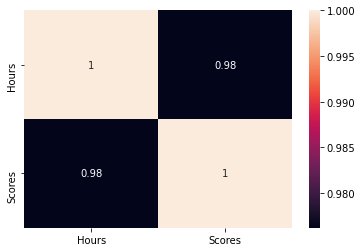

In [8]:
sns.heatmap(s_data.corr(),annot=True)

<AxesSubplot:ylabel='Density'>

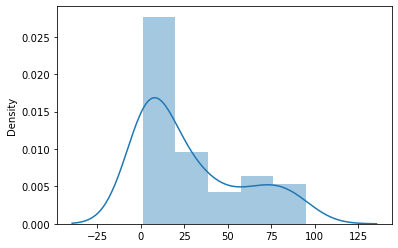

In [9]:
sns.distplot(s_data)

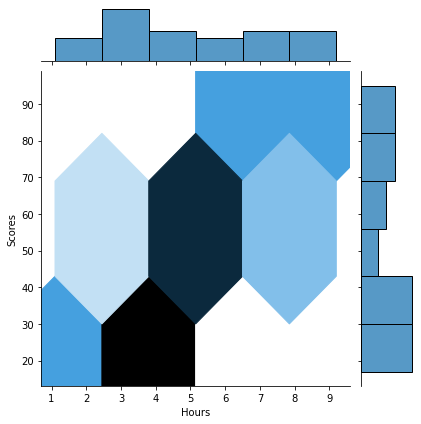

In [10]:
sns.jointplot(x='Hours', y='Scores',data=s_data, kind='hex')

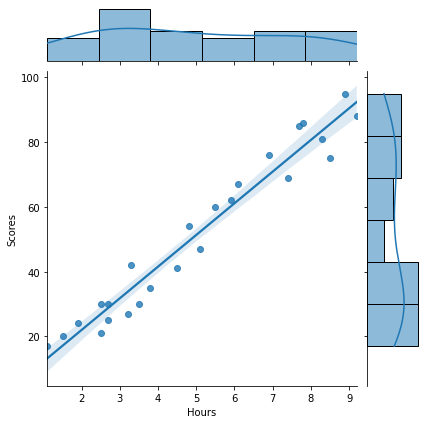

In [11]:
sns.jointplot(x='Hours', y='Scores',data=s_data, kind='reg')

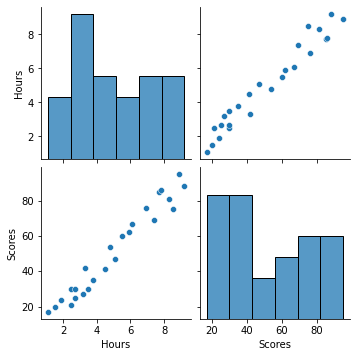

In [12]:
sns.pairplot(s_data)

Text(0, 0.5, 'Percentage Score')

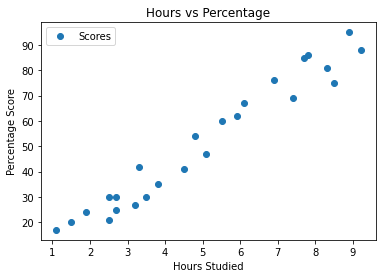

In [13]:
s_data.plot(x='Hours', y='Scores', style='o')  
plt.title('Hours vs Percentage')  
plt.xlabel('Hours Studied')  
plt.ylabel('Percentage Score')  

**From the graph above, we can clearly see that there is a positive linear relation between the number of hours studied and percentage of score.**

## Linear Regression Model

### **Preparing the data**

In [14]:
X = s_data.iloc[:, :-1].values  
y = s_data.iloc[:, 1].values  

### split this data into training and test sets

In [15]:
from sklearn.model_selection import train_test_split  
X_train, X_test, y_train, y_test = train_test_split(X, y, 
                            test_size=0.2, random_state=0) 

### **Training the Algorithm** 

In [16]:
from sklearn.linear_model import LinearRegression  
regressor = LinearRegression()  
regressor.fit(X_train, y_train) 

print("Training complete.")

Training complete.


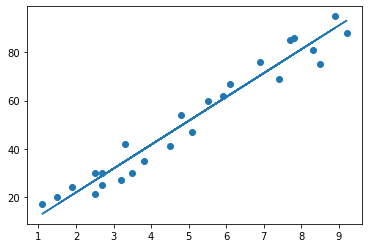

In [17]:
# Plotting the regression line
line = regressor.coef_*X+regressor.intercept_

# Plotting for the test data
plt.scatter(X, y)
plt.plot(X, line);

### Checking the accuracy scores for training and test set

In [18]:
print('Test Score')
print(regressor.score(X_test, y_test))
print('Training Score')
print(regressor.score(X_train, y_train))

Test Score
0.9454906892105356
Training Score
0.9515510725211552


### **Making Predictions**

In [19]:
print(X_test) # Testing data - In Hours
y_pred = regressor.predict(X_test) # Predicting the scores

[[1.5]
 [3.2]
 [7.4]
 [2.5]
 [5.9]]


In [20]:
# Comparing Actual vs Predicted
df = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})  
df 

,Actual,Predicted
0,20,16.884145
1,27,33.732261
2,69,75.357018
3,30,26.794801
4,62,60.491033


In [21]:
# You can also test with your own data 
# predict the score for 9.25 hours
print('Score of student who studied for 9.25 hours a day', regressor.predict([[9.25]]))

Score of student who studied for 9.25 hours a day [93.69173249]


### **Evaluating the model**

In [22]:
from sklearn import metrics  
print('Mean Absolute Error:', 
      metrics.mean_absolute_error(y_test, y_pred))
print('Mean Square Error:', 
      metrics.mean_squared_error(y_test, y_pred)) 

Mean Absolute Error: 4.183859899002975
Mean Square Error: 21.5987693072174
